# Aim : Predict sale price of vehicles listed on the site
    
    Purpose : sales prices is required for 
    1. Sale 
    2. Auction of used cars. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read and analyse data

df = pd.read_csv('Vehicle_Price.csv')

In [3]:
df.head()

,Asset_ID*,Product_Name,Manufacturing_Year*,Motor_Operating_Hours,Mileage,Machine_Serial_No,Gross_Weight,Operating_Weight,Bucket_Capacity,Engine_Power,Lifting_Capacity,Service_Date,Operating_Hours,Service_at_KMs,Engine_Repaired_Overhauling,Valuation_Amount,Sale_Price*
0,1.49E+12,Backhoe Loader 0101 Caterpillar 424B,2015,10,20.0,jbn201,120.0,120.0,120.0,120.0,120.0,2/4/2017 0:00,10.0,20.0,Yes,100021.0,110023
1,1.49E+12,Backhoe Loader 0101 Caterpillar 424B,2015,10,10.0,mk120,150.0,150.0,150.0,150.0,150.0,2/9/2017 0:00,10.0,12.0,No,100193.0,110212
2,1.49E+12,Bus Eicher 10.9,2016,10,10.0,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,Yes,100035.0,110039
3,1.49E+12,Bus Eicher 10.75,2017,20,30.0,EC121WS,10.0,10.0,10.0,10.0,10.0,2/4/2017 0:00,20.0,20.0,Yes,100114.0,110125
4,1.49E+12,Batching Plant 12 Schwing Stetter Asset1,2016,20,30.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,20.0,NaN,Yes,100046.0,110051


In [4]:
df.shape

(931, 17)

# Understanding the data

In [5]:
df.isnull().mean()*100

Asset_ID*                       0.000000
Product_Name                    0.000000
Manufacturing_Year*             0.000000
Motor_Operating_Hours           4.618690
Mileage                        10.418904
Machine_Serial_No              70.998926
Gross_Weight                   56.176155
Operating_Weight               57.357680
Bucket_Capacity                 3.974221
Engine_Power                   57.357680
Lifting_Capacity               66.595059
Service_Date                   90.870032
Operating_Hours                 3.866810
Service_at_KMs                 90.655209
Engine_Repaired_Overhauling     0.000000
Valuation_Amount               64.446831
Sale_Price*                     0.000000
dtype: float64

In [6]:
df.describe()

,Manufacturing_Year*,Mileage,Gross_Weight,Operating_Weight,Bucket_Capacity,Engine_Power,Lifting_Capacity,Operating_Hours,Service_at_KMs,Valuation_Amount,Sale_Price*
count,931.000000,834.000000,408.000000,397.000000,894.000000,397.000000,311.000000,895.000000,87.000000,3.310000e+02,9.310000e+02
mean,2014.790548,24.435252,104.117647,156.141058,91.176734,798.287154,302.926045,163.015642,95.931034,2.928996e+05,1.626678e+06
std,4.992269,35.077808,168.381006,176.706986,160.344059,2589.514754,591.618549,129.442281,235.284775,1.418788e+06,1.576622e+07
min,1981.000000,1.000000,1.000000,1.000000,10.000000,1.000000,0.000000,1.000000,1.000000,5.000000e+04,2.000000e+03
25%,2011.000000,11.000000,11.000000,12.000000,10.000000,12.000000,11.000000,23.000000,11.000000,1.000815e+05,1.101730e+05
50%,2017.000000,20.000000,34.000000,121.000000,10.000000,52.000000,43.000000,233.000000,12.000000,1.001670e+05,2.000000e+05
75%,2018.000000,20.000000,120.000000,251.000000,150.000000,400.000000,546.000000,250.000000,60.000000,1.002555e+05,8.000000e+05
max,2020.000000,500.000000,1200.000000,1200.000000,2400.000000,12000.000000,3400.000000,500.000000,1500.000000,2.111111e+07,4.589657e+08


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Asset_ID*                    931 non-null    object 
 1   Product_Name                 931 non-null    object 
 2   Manufacturing_Year*          931 non-null    int64  
 3   Motor_Operating_Hours        888 non-null    object 
 4   Mileage                      834 non-null    float64
 5   Machine_Serial_No            270 non-null    object 
 6   Gross_Weight                 408 non-null    float64
 7   Operating_Weight             397 non-null    float64
 8   Bucket_Capacity              894 non-null    float64
 9   Engine_Power                 397 non-null    float64
 10  Lifting_Capacity             311 non-null    float64
 11  Service_Date                 85 non-null     object 
 12  Operating_Hours              895 non-null    float64
 13  Service_at_KMs      

In [8]:
for i in df.columns:
    if df[i].isnull().mean()>= 0.90:
        df.drop([i], axis = 1, inplace = True)

In [9]:
df.head()

,Asset_ID*,Product_Name,Manufacturing_Year*,Motor_Operating_Hours,Mileage,Machine_Serial_No,Gross_Weight,Operating_Weight,Bucket_Capacity,Engine_Power,Lifting_Capacity,Operating_Hours,Engine_Repaired_Overhauling,Valuation_Amount,Sale_Price*
0,1.49E+12,Backhoe Loader 0101 Caterpillar 424B,2015,10,20.0,jbn201,120.0,120.0,120.0,120.0,120.0,10.0,Yes,100021.0,110023
1,1.49E+12,Backhoe Loader 0101 Caterpillar 424B,2015,10,10.0,mk120,150.0,150.0,150.0,150.0,150.0,10.0,No,100193.0,110212
2,1.49E+12,Bus Eicher 10.9,2016,10,10.0,NaN,NaN,NaN,150.0,NaN,NaN,NaN,Yes,100035.0,110039
3,1.49E+12,Bus Eicher 10.75,2017,20,30.0,EC121WS,10.0,10.0,10.0,10.0,10.0,20.0,Yes,100114.0,110125
4,1.49E+12,Batching Plant 12 Schwing Stetter Asset1,2016,20,30.0,NaN,NaN,NaN,10.0,NaN,NaN,20.0,Yes,100046.0,110051


In [10]:
df.drop(['Asset_ID*', 'Product_Name', 'Machine_Serial_No'], axis = 1, inplace = True)

In [11]:
df.head()

,Manufacturing_Year*,Motor_Operating_Hours,Mileage,Gross_Weight,Operating_Weight,Bucket_Capacity,Engine_Power,Lifting_Capacity,Operating_Hours,Engine_Repaired_Overhauling,Valuation_Amount,Sale_Price*
0,2015,10,20.0,120.0,120.0,120.0,120.0,120.0,10.0,Yes,100021.0,110023
1,2015,10,10.0,150.0,150.0,150.0,150.0,150.0,10.0,No,100193.0,110212
2,2016,10,10.0,NaN,NaN,150.0,NaN,NaN,NaN,Yes,100035.0,110039
3,2017,20,30.0,10.0,10.0,10.0,10.0,10.0,20.0,Yes,100114.0,110125
4,2016,20,30.0,NaN,NaN,10.0,NaN,NaN,20.0,Yes,100046.0,110051


In [12]:
df.shape

(931, 12)

# Feature Engineering

    1. Handling missing values in continues function 

array([[<AxesSubplot:title={'center':'Manufacturing_Year*'}>,
        <AxesSubplot:title={'center':'Mileage'}>,
        <AxesSubplot:title={'center':'Gross_Weight'}>],
       [<AxesSubplot:title={'center':'Operating_Weight'}>,
        <AxesSubplot:title={'center':'Bucket_Capacity'}>,
        <AxesSubplot:title={'center':'Engine_Power'}>],
       [<AxesSubplot:title={'center':'Lifting_Capacity'}>,
        <AxesSubplot:title={'center':'Operating_Hours'}>,
        <AxesSubplot:title={'center':'Valuation_Amount'}>],
       [<AxesSubplot:title={'center':'Sale_Price*'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

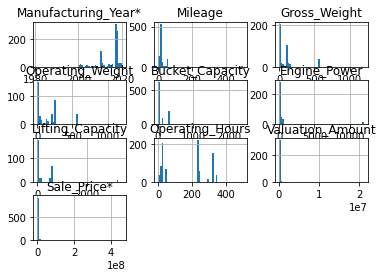

In [13]:
df.hist(bins = 50)

Observation - since data is skewed, so median shall be considered to fill the NA

In [14]:
df_missing = df.isnull().mean()*100
df_missing

Manufacturing_Year*             0.000000
Motor_Operating_Hours           4.618690
Mileage                        10.418904
Gross_Weight                   56.176155
Operating_Weight               57.357680
Bucket_Capacity                 3.974221
Engine_Power                   57.357680
Lifting_Capacity               66.595059
Operating_Hours                 3.866810
Engine_Repaired_Overhauling     0.000000
Valuation_Amount               64.446831
Sale_Price*                     0.000000
dtype: float64

In [15]:
df['Gross_Weight'].median()

34.0

In [16]:
df['Gross_Weight'].fillna(df['Gross_Weight'].median(), inplace = True)
# df['Operating_Weight '].fillna(df['Operating_Weight'].median(), inplace = True)
df['Bucket_Capacity'].fillna(df['Bucket_Capacity'].median(), inplace = True)
df['Engine_Power'].fillna(df['Engine_Power'].median(),inplace = True)
df['Lifting_Capacity'].fillna(df['Lifting_Capacity'].median(), inplace = True)
df['Operating_Hours'].fillna(df['Operating_Hours'].median(),inplace = True)
# df['Motor_Operating_Hours'].fillna(df['Motor_Operating_Hours'].median(),inplace = True)
df['Mileage'].fillna(df['Mileage'].median(),inplace = True)

In [17]:
df.isnull().sum()

Manufacturing_Year*              0
Motor_Operating_Hours           43
Mileage                          0
Gross_Weight                     0
Operating_Weight               534
Bucket_Capacity                  0
Engine_Power                     0
Lifting_Capacity                 0
Operating_Hours                  0
Engine_Repaired_Overhauling      0
Valuation_Amount               600
Sale_Price*                      0
dtype: int64

In [18]:
# droping the column as per business logic

df.drop('Valuation_Amount', axis =1, inplace = True)

<AxesSubplot:>

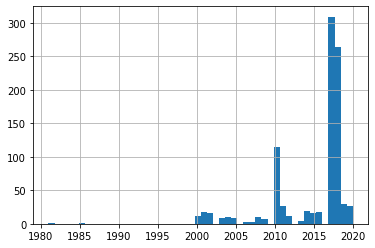

In [19]:
df['Manufacturing_Year*'].hist(bins=50)

In [20]:
# adding one new feature 'Vehicle Age' by '2020 - Manufacturing_Year*'

df['vehicle_age'] = (2020 - df['Manufacturing_Year*'])

<AxesSubplot:>

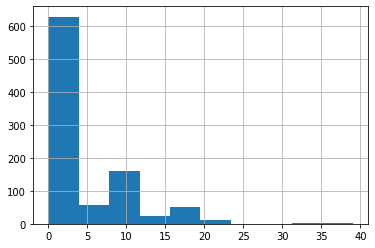

In [21]:
df['vehicle_age'].hist()

In [22]:
# droping  
df.drop('Manufacturing_Year*', axis =1, inplace = True)

array([[<AxesSubplot:title={'center':'Mileage'}>,
        <AxesSubplot:title={'center':'Gross_Weight'}>,
        <AxesSubplot:title={'center':'Operating_Weight'}>],
       [<AxesSubplot:title={'center':'Bucket_Capacity'}>,
        <AxesSubplot:title={'center':'Engine_Power'}>,
        <AxesSubplot:title={'center':'Lifting_Capacity'}>],
       [<AxesSubplot:title={'center':'Operating_Hours'}>,
        <AxesSubplot:title={'center':'Sale_Price*'}>,
        <AxesSubplot:title={'center':'vehicle_age'}>]], dtype=object)

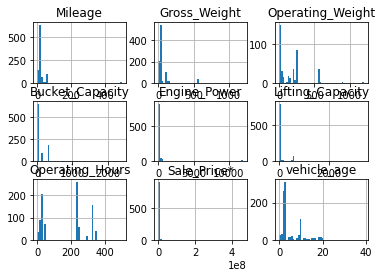

In [23]:
df.hist(bins=50)

<AxesSubplot:>

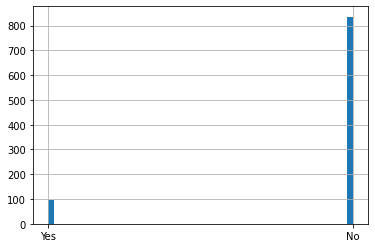

In [24]:
df['Engine_Repaired_Overhauling'].hist(bins=50)

In [25]:
df = pd.get_dummies(df,drop_first=True)

In [26]:
df.columns

Index(['Mileage', 'Gross_Weight', 'Operating_Weight', 'Bucket_Capacity',
       'Engine_Power', 'Lifting_Capacity', 'Operating_Hours', 'Sale_Price*',
       'vehicle_age', 'Motor_Operating_Hours_10', 'Motor_Operating_Hours_100',
       'Motor_Operating_Hours_1000', 'Motor_Operating_Hours_1045',
       'Motor_Operating_Hours_11', 'Motor_Operating_Hours_111',
       'Motor_Operating_Hours_12', 'Motor_Operating_Hours_120',
       'Motor_Operating_Hours_121', 'Motor_Operating_Hours_123',
       'Motor_Operating_Hours_14', 'Motor_Operating_Hours_15',
       'Motor_Operating_Hours_150', 'Motor_Operating_Hours_20',
       'Motor_Operating_Hours_200', 'Motor_Operating_Hours_2000',
       'Motor_Operating_Hours_21', 'Motor_Operating_Hours_213',
       'Motor_Operating_Hours_22233', 'Motor_Operating_Hours_23',
       'Motor_Operating_Hours_230', 'Motor_Operating_Hours_250',
       'Motor_Operating_Hours_300', 'Motor_Operating_Hours_340',
       'Motor_Operating_Hours_344', 'Motor_Operating_Hours

In [27]:
df_final = df[['Mileage', 'Gross_Weight', 'Operating_Weight', 'Bucket_Capacity',
              'Engine_Power', 'Lifting_Capacity', 'Operating_Hours', 'Sale_Price*',
               'vehicle_age', 'Engine_Repaired_Overhauling_Yes']]

In [28]:
df_final['Operating_Weight'].median()

121.0

In [29]:
df_final['Operating_Weight'].fillna(df_final['Operating_Weight'].median(), inplace = True)

C:\Users\Sujeet\anaconda3\envs\carpriceprediction\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [30]:
df_final['Operating_Weight'].isnull().mean()

0.0

In [31]:
# finding the correlation b/w the features 

df_final.corr()

,Mileage,Gross_Weight,Operating_Weight,Bucket_Capacity,Engine_Power,Lifting_Capacity,Operating_Hours,Sale_Price*,vehicle_age,Engine_Repaired_Overhauling_Yes
Mileage,1.000000,-0.030623,-0.025816,-0.097956,-0.010554,-0.001464,-0.025733,0.027358,0.061897,-0.001117
Gross_Weight,-0.030623,1.000000,0.921604,-0.072781,0.022883,0.344107,0.170989,-0.019670,-0.040535,-0.066295
Operating_Weight,-0.025816,0.921604,1.000000,-0.046635,0.151826,0.397068,0.202572,-0.021893,-0.042190,-0.170939
Bucket_Capacity,-0.097956,-0.072781,-0.046635,1.000000,0.175648,0.209801,-0.241675,-0.032186,-0.186822,-0.082627
Engine_Power,-0.010554,0.022883,0.151826,0.175648,1.000000,0.321247,-0.021068,-0.015704,-0.022046,-0.036593
Lifting_Capacity,-0.001464,0.344107,0.397068,0.209801,0.321247,1.000000,0.153075,-0.017912,-0.009721,-0.040711
Operating_Hours,-0.025733,0.170989,0.202572,-0.241675,-0.021068,0.153075,1.000000,-0.047312,-0.013323,-0.128478
Sale_Price*,0.027358,-0.019670,-0.021893,-0.032186,-0.015704,-0.017912,-0.047312,1.000000,0.111410,0.012163
vehicle_age,0.061897,-0.040535,-0.042190,-0.186822,-0.022046,-0.009721,-0.013323,0.111410,1.000000,0.189954
Engine_Repaired_Overhauling_Yes,-0.001117,-0.066295,-0.170939,-0.082627,-0.036593,-0.040711,-0.128478,0.012163,0.189954,1.000000


In [32]:
import seaborn as sns

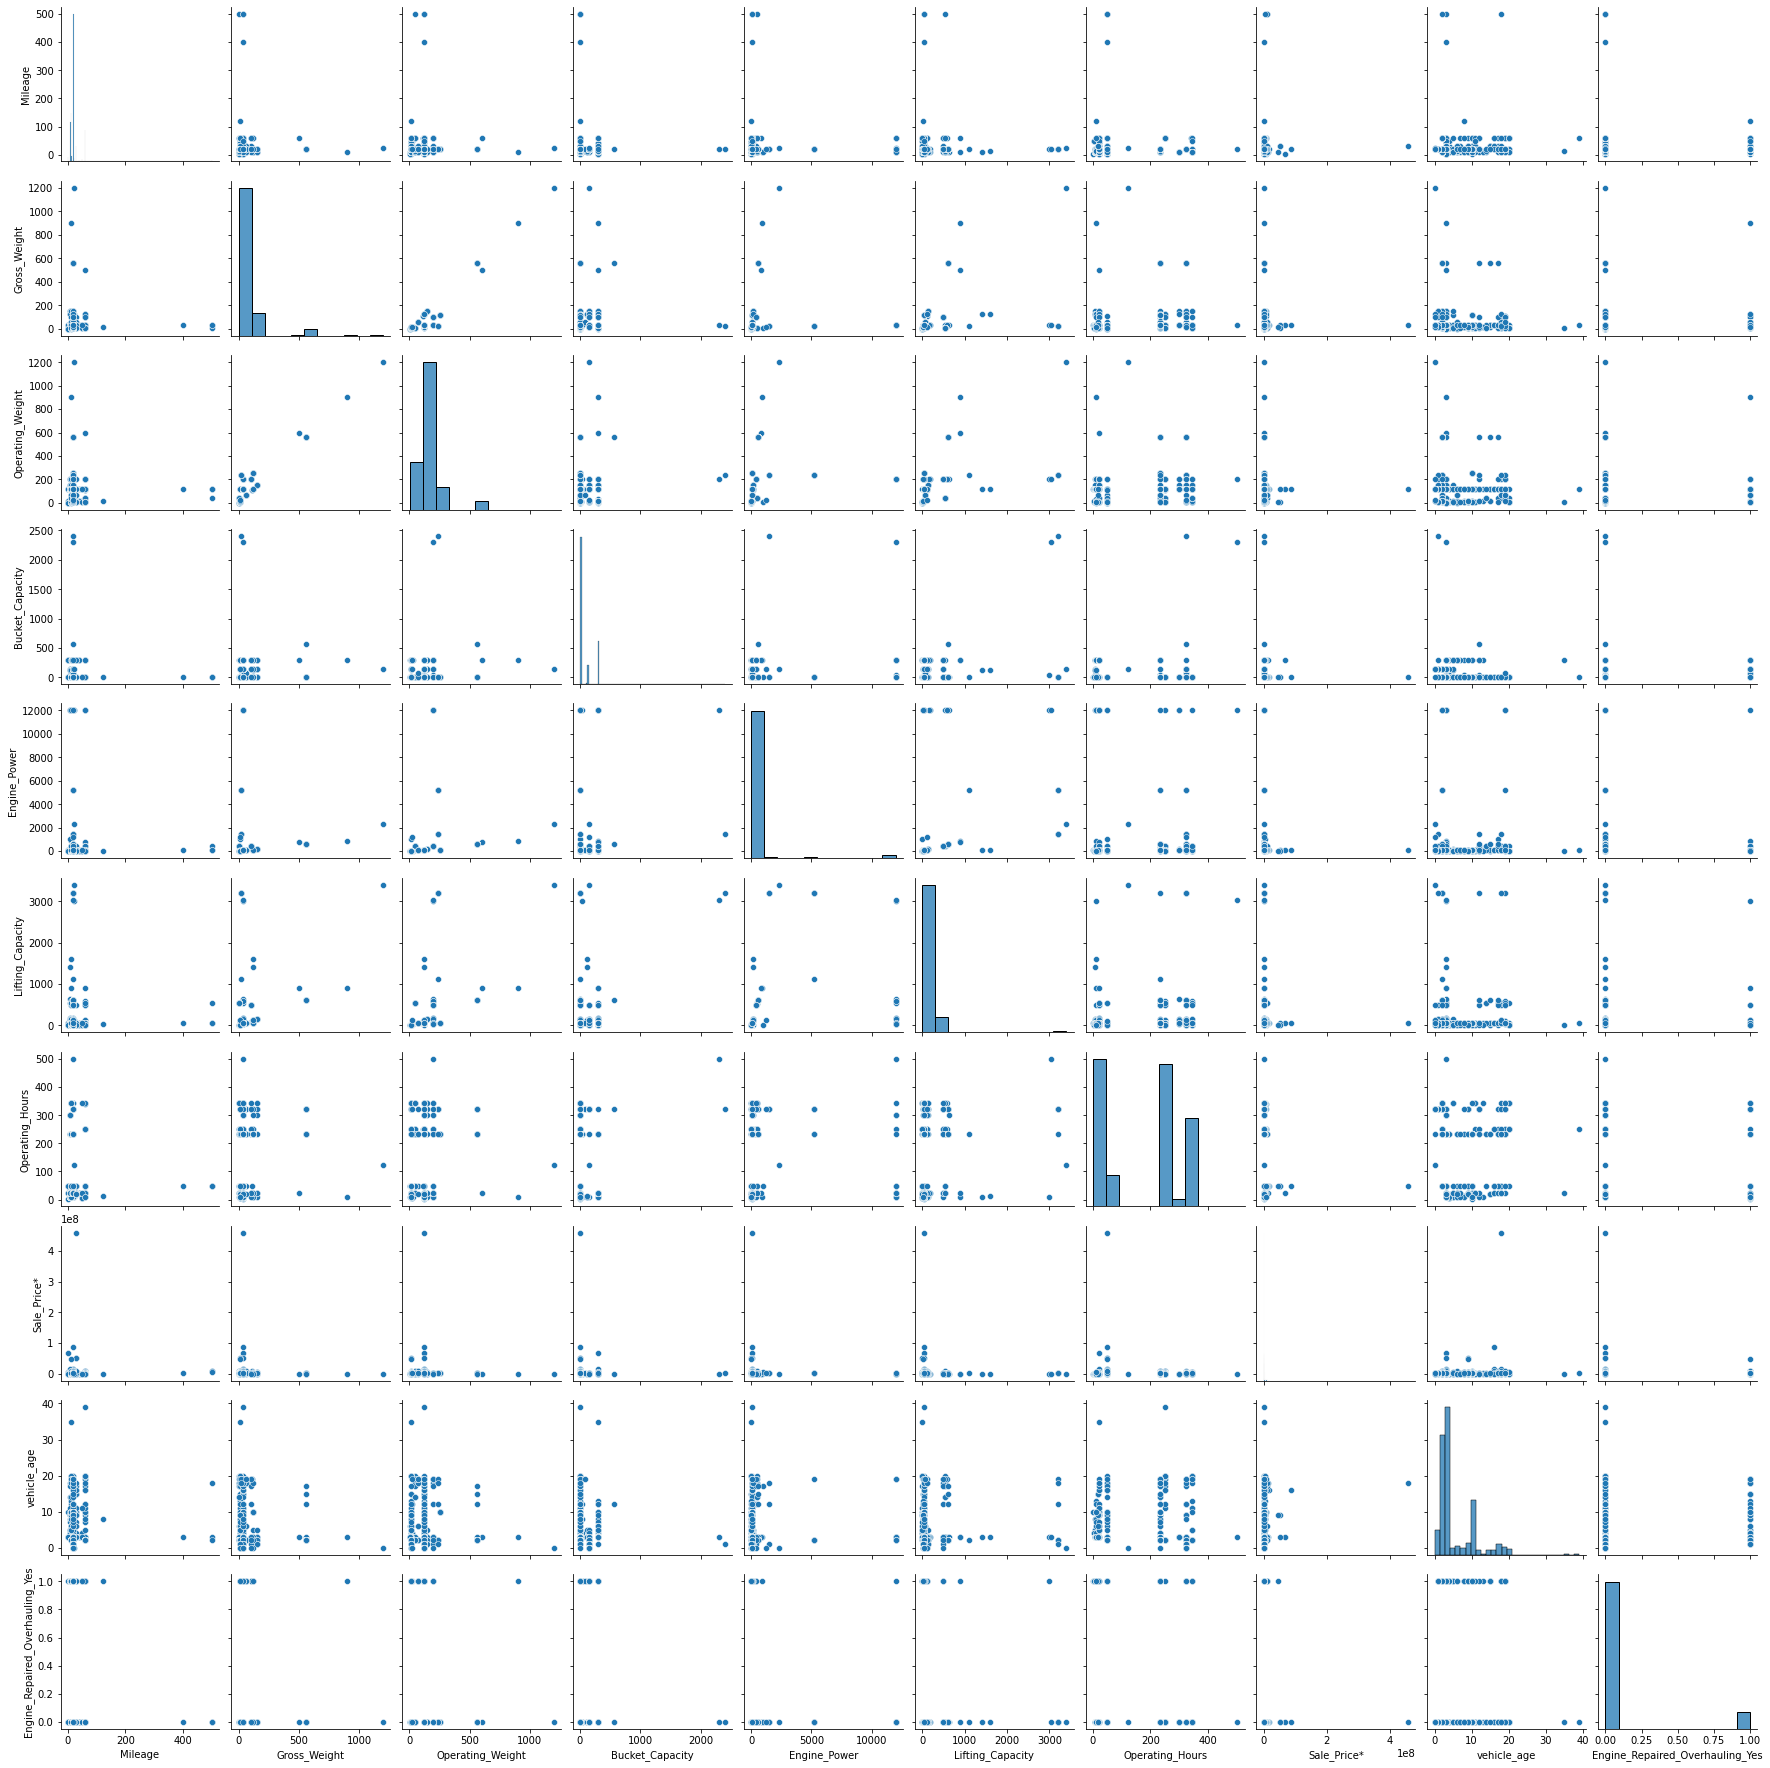

In [33]:
sns.pairplot(df_final)

In [34]:
import seaborn as sns

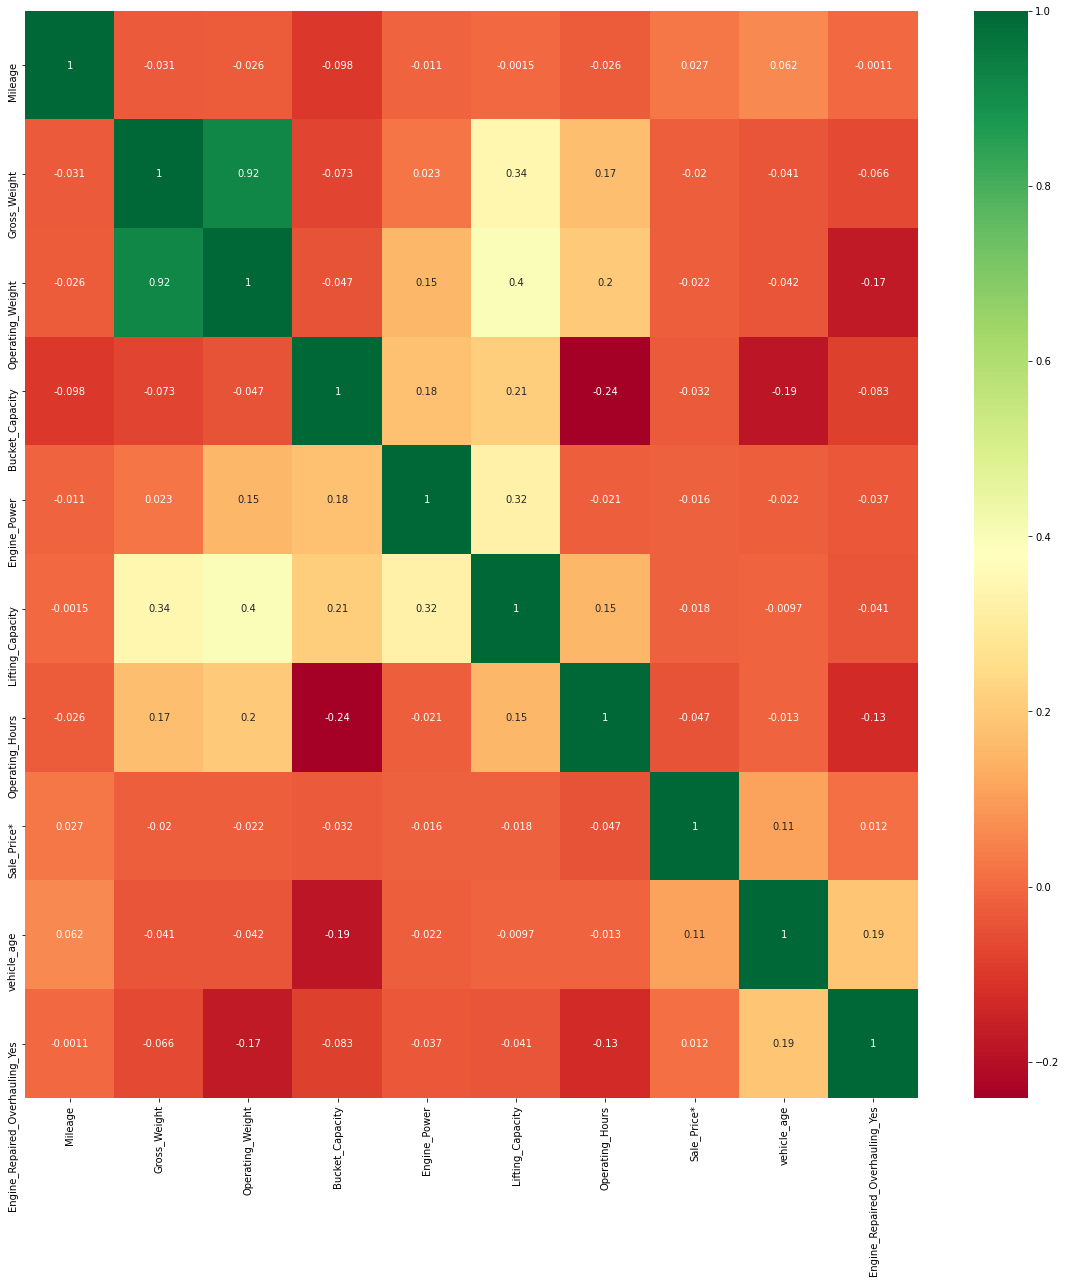

In [35]:
# observation - since not much information can be derived from the above so lets draw heat-map
# get correlations of each features in dataset

corrmat = df_final.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
# plot heatmap
# g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdY1Gn')
g = sns.heatmap(df_final[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [36]:
df_final.columns

Index(['Mileage', 'Gross_Weight', 'Operating_Weight', 'Bucket_Capacity',
       'Engine_Power', 'Lifting_Capacity', 'Operating_Hours', 'Sale_Price*',
       'vehicle_age', 'Engine_Repaired_Overhauling_Yes'],
      dtype='object')

In [37]:
X = df_final[['Mileage', 'Gross_Weight', 'Operating_Weight', 'Bucket_Capacity', 'Engine_Power', 'Lifting_Capacity', 'Operating_Hours','vehicle_age', 'Engine_Repaired_Overhauling_Yes']]

In [38]:
y = df_final['Sale_Price*']

In [39]:
#  Now, in order to select the best features, letz find the best parameters 

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)


ExtraTreesRegressor()

In [40]:
print(model.feature_importances_)

[0.42024152 0.0110394  0.03944595 0.00116512 0.01456715 0.00942613
 0.10312341 0.39309177 0.00789955]


# Observation - 

    Best features are - 
        1. Mileage
        2. vehicle_age
        3. Operating_Hours
        4. Operating_Weight
        5. Gross_Weight

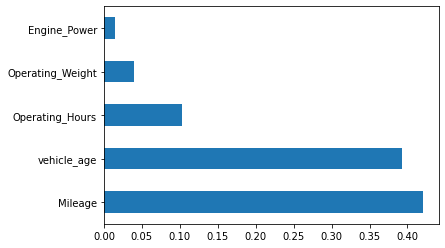

In [41]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [43]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [44]:
regressor=RandomForestRegressor()

In [45]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [48]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [49]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestRegressor()

In [50]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [51]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [52]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 15,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 5}

In [53]:
predictions=rf_random.predict(X_test)

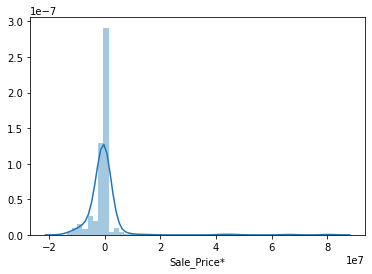

In [55]:
sns.distplot(y_test-predictions)

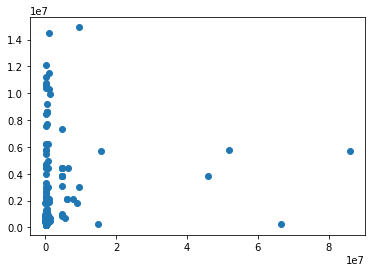

In [56]:
plt.scatter(y_test,predictions)

In [57]:
from sklearn import metrics

In [58]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2355107.9763540938
MSE: 62284816103847.375
RMSE: 7892072.991543311


In [59]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)